# Predicting Future Sales - a Kaggle Competition

## Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import glob

In [3]:
files = glob.glob('data/*.csv')

In [4]:
files

['data\\items.csv',
 'data\\item_categories.csv',
 'data\\sales_train.csv',
 'data\\sample_submission.csv',
 'data\\shops.csv',
 'data\\test.csv']

We'll be using the sales_train.csv file for our analysis.

In [13]:
df = pd.read_csv(files[2])

In [14]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [15]:
cats = pd.read_csv(files[1])
items = pd.read_csv(files[0])
shops = pd.read_csv(files[-2])
test = pd.read_csv(files[-1])

In [16]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [17]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [18]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [20]:
df = pd.merge(df, shops)
df = pd.merge(df, items)
df = pd.merge(df, cats)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [31]:
df.groupby('shop_name').sum()['item_cnt_day'].sort_values(ascending=False)

shop_name
Москва ТЦ "Семеновский"                            310777.0
Москва ТРК "Атриум"                                241920.0
Химки ТЦ "Мега"                                    185790.0
Москва ТЦ "МЕГА Теплый Стан" II                    184557.0
СПб ТК "Невский Центр"                             144934.0
Якутск Орджоникидзе, 56                            141107.0
Москва ТЦ "МЕГА Белая Дача II"                     136657.0
Воронеж (Плехановская, 13)                         100489.0
Якутск ТЦ "Центральный"                             81734.0
Сергиев Посад ТЦ "7Я"                               78990.0
Чехов ТРЦ "Карнавал"                                78079.0
Тюмень ТЦ "Гудвин"                                  76238.0
Интернет-магазин ЧС                                 73478.0
Курск ТЦ "Пушкинский"                               73455.0
Калуга ТРЦ "XXI век"                                71201.0
Н.Новгород ТРЦ "Фантастика"                         69016.0
Москва МТРЦ "Афи Молл"        

In [34]:
df = df.set_index('date')

In [38]:
df.groupby([pd.Grouper(freq='M'), 'shop_name']).sum()['item_cnt_day']

date        shop_name                     
2013-01-31  !Якутск Орджоникидзе, 56 фран     3626.0
            !Якутск ТЦ "Центральный" фран     1955.0
            Адыгея ТЦ "Мега"                   748.0
            Балашиха ТРК "Октябрь-Киномир"     670.0
            Волжский ТЦ "Волга Молл"          1685.0
                                               ...  
2015-12-31  Цифровой склад 1С-Онлайн           982.0
            Чехов ТРЦ "Карнавал"               442.0
            Якутск Орджоникидзе, 56            701.0
            Якутск ТЦ "Центральный"            559.0
            Ярославль ТЦ "Альтаир"             307.0
Name: item_cnt_day, Length: 1847, dtype: float64

In [41]:
df = df.reset_index()

In [42]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-02-01,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-02-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-03-01,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   shop_name           object        
 7   item_name           object        
 8   item_category_id    int64         
 9   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 224.0+ MB


C:\Users\jpzam\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='item_cnt_day'>

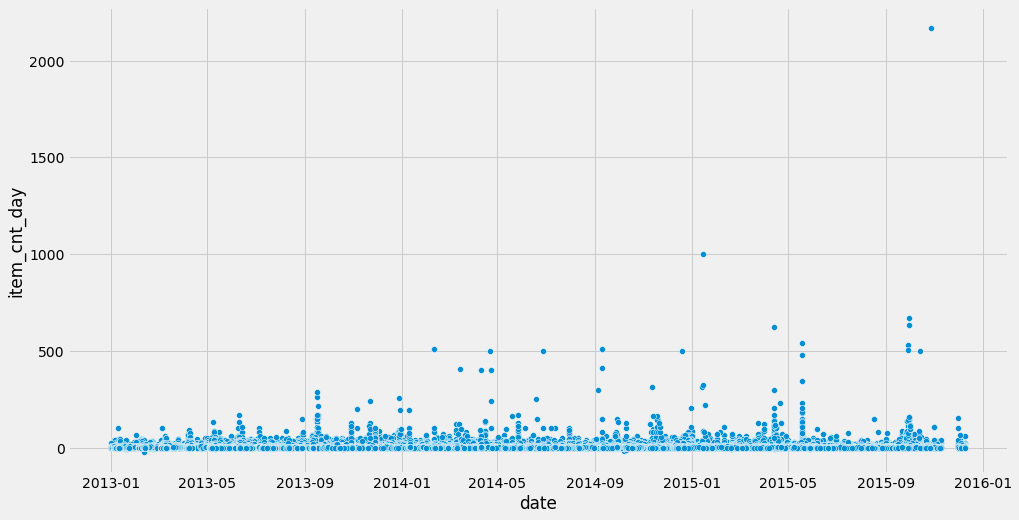

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot('date', 'item_cnt_day', data=df)

In [50]:
df[df['item_cnt_day'] > 1000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
2900512,2015-10-28,33,12,11373,0.908714,2169.0,Интернет-магазин ЧС,Доставка до пункта выдачи (Boxberry),9,Доставка товара


In [ ]:
!git add 